### Agent-Lab: Coordinator -> Planner -> Supervisor Agent

Objective of this notebook is evaluating and adapting the architecture of [LangManus Hierarchical Agent](https://github.com/langmanus/langmanus?tab=readme-ov-file#architecture).

#### Preparation steps:

Before executing the notebook perform the following preparation steps.

1. Start Docker containers: `docker compose up -d --build`

2. Verify application is up and running, with web browser: `http://localhost:18000/docs`

3. Inside project root directory, create a `.env` file with env vars with correct values:

    ```
    DEVELOPING="True"
    OLLAMA_ENDPOINT="http://localhost:11434"
    TAVILY_API_KEY="???"
    XAI_API_KEY="???"
    ```

---

In [1]:
%%capture

import os
os.chdir('..')

from dotenv import load_dotenv
load_dotenv()

from notebooks import experiment_utils
from app.core.container import Container
from app.interface.api.messages.schema import MessageRequest

# start dependency injection container
container = Container()
container.init_resources()
container.wire(modules=[__name__])

In [2]:
# create agent
# agent = experiment_utils.create_ollama_agent(
#     agent_type="coordinator_planner_supervisor",
#     llm_tag="phi4-mini:latest", #"mistral-small:24b",
#     ollama_endpoint=os.getenv("OLLAMA_ENDPOINT")
# )

agent = experiment_utils.create_xai_agent(
    agent_type="coordinator_planner_supervisor",
    llm_tag="grok-2",
    api_key=os.getenv("XAI_API_KEY")
)

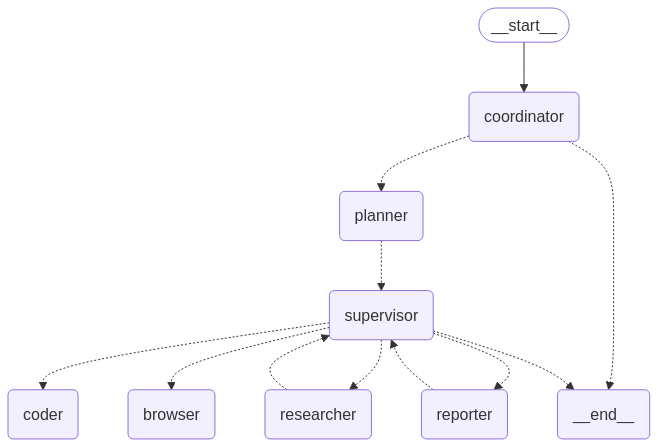

In [3]:
# get agent instance
coordinator_planner_supervisor_agent = container.coordinator_planner_supervisor_agent()

# get checkpointer instance
graph_persistence_factory = container.graph_persistence_factory()
checkpointer = graph_persistence_factory.build_checkpoint_saver()

# Create Graph
workflow_builder = coordinator_planner_supervisor_agent.get_workflow_builder(agent["id"])
workflow = workflow_builder.compile(checkpointer=checkpointer)
experiment_utils.print_graph(workflow)

In [4]:
agent_config = {
    "configurable": {
        "thread_id": agent["id"],
    },
    "recursion_limit": 30
}

In [5]:
%%capture
message = MessageRequest(
    message_role="human",
    message_content="What characterizes a good general according to Sun Tzu?",
    agent_id=agent["id"]
)

inputs = coordinator_planner_supervisor_agent.get_input_params(message)
result = workflow.invoke(inputs, agent_config)

In [8]:
print(result["messages"][-1].content)

# Report on Characteristics of a Good General According to Sun Tzu

## Executive Summary
This report compiles the characteristics of a good general as outlined by Sun Tzu in his seminal work, 'The Art of War'. The analysis is based on direct quotes and interpretations from the text, highlighting the essential qualities a general should possess according to Sun Tzu.

## Key Findings
- **Command from Sovereign**: Sun Tzu emphasizes that a general must receive commands from the sovereign, indicating a clear hierarchical structure.
- **Adaptability**: The general must be adaptable to the fluid and unpredictable nature of war, akin to natural phenomena.
- **Strategic Planning**: Importance is placed on deliberation, planning, and the ability to act rapidly while maintaining clear conception and deep design.
- **Utilization of Environment**: The natural formation of the country is considered the soldier’s best ally, highlighting the need for generals to understand and leverage terrain.
- **E